Import pandas and numpy

In [1]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib
matplotlib.style.use('ggplot') 

Test some python easter egg

In [2]:
import __hello__

Hello world...


In [3]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Data Preparation with Pandas 

Data taken from Github: https://github.com/veekun/pokedex

In [6]:
path = "../pokedex/pokedex/data/csv/"

Load data

In [7]:
pokemons = pd.read_csv(path + "pokemon.csv",sep=",")
pokemon_species_names = pd.read_csv(path + "pokemon_species_names.csv",sep=",")
pokemon_species = pd.read_csv(path + "pokemon_species.csv",sep=",")
generation_names = pd.read_csv(path + "generation_names.csv", sep=",")
habitat = pd.read_csv(path + "pokemon_habitats.csv")

### Series and DataFrames

In [8]:
type(pokemons)

pandas.core.frame.DataFrame

In [9]:
pokemons.head(2)

,id,identifier,species_id,height,weight,base_experience,order,is_default
0,1,bulbasaur,1,7,69,64,1,1
1,2,ivysaur,2,10,130,142,2,1


In [11]:
pokemons.columns

Index([u'id', u'identifier', u'species_id', u'height', u'weight',
       u'base_experience', u'order', u'is_default'],
      dtype='object')

In [12]:
pokemons.dtypes

id                  int64
identifier         object
species_id          int64
height              int64
weight              int64
base_experience     int64
order               int64
is_default          int64
dtype: object

In [13]:
type(pokemons['identifier']), type(pokemons.identifier)

(pandas.core.series.Series, pandas.core.series.Series)

In [14]:
pokemons.identifier.head(5)

0     bulbasaur
1       ivysaur
2      venusaur
3    charmander
4    charmeleon
Name: identifier, dtype: object

### Selecting Internal Elements

In [15]:
pokemons.ix[0]

id                         1
identifier         bulbasaur
species_id                 1
height                     7
weight                    69
base_experience           64
order                      1
is_default                 1
Name: 0, dtype: object

In [16]:
pokemons['identifier'].head(5)

0     bulbasaur
1       ivysaur
2      venusaur
3    charmander
4    charmeleon
Name: identifier, dtype: object

In [17]:
pokemons.ix[0,'weight']

69

### Assigning Values

In [22]:
pokemons['new_column'] = 'MGA POGING POKEMON'

In [23]:
pokemons.head(2)

,id,identifier,species_id,height,weight,base_experience,order,is_default,new_column
0,1,bulbasaur,1,7,69,64,1,1,MGA POGING POKEMON
1,2,ivysaur,2,10,130,142,2,1,MGA POGING POKEMON


In [24]:
pokemons.ix[1,'new_column'] = 'AY HINDI PALA POGI, HALAMAN PALA SILA.'

In [25]:
pokemons.head(2)

,id,identifier,species_id,height,weight,base_experience,order,is_default,new_column
0,1,bulbasaur,1,7,69,64,1,1,MGA POGING POKEMON
1,2,ivysaur,2,10,130,142,2,1,"AY HINDI PALA POGI, HALAMAN PALA SILA."


### Evaluating values

Discover values of new_column

In [26]:
pd.unique(pokemons['new_column'])

array(['MGA POGING POKEMON', 'AY HINDI PALA POGI, HALAMAN PALA SILA.'], dtype=object)

### Basic Stats

In [27]:
pokemons.describe()

,id,species_id,height,weight,base_experience,order,is_default
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,1435.728730,360.880395,12.516646,636.096178,151.742293,406.000000,0.889026
std,3050.119235,209.331096,12.266613,1077.658710,79.150608,234.259827,0.314294
min,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000,0.000000
25%,203.500000,181.500000,6.000000,94.500000,67.000000,203.500000,1.000000
50%,406.000000,362.000000,10.000000,295.000000,158.000000,406.000000,1.000000
75%,608.500000,538.500000,15.000000,650.000000,189.000000,608.500000,1.000000
max,10090.000000,721.000000,145.000000,9997.000000,608.000000,811.000000,1.000000


Get a more relevant stats for a more relevant columns

In [28]:
pokemons[['height','weight','base_experience']].describe()

,height,weight,base_experience
count,811.000000,811.000000,811.000000
mean,12.516646,636.096178,151.742293
std,12.266613,1077.658710,79.150608
min,1.000000,1.000000,36.000000
25%,6.000000,94.500000,67.000000
50%,10.000000,295.000000,158.000000
75%,15.000000,650.000000,189.000000
max,145.000000,9997.000000,608.000000


(array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a0f7cd0>]], dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a36ef10>]], dtype=object))

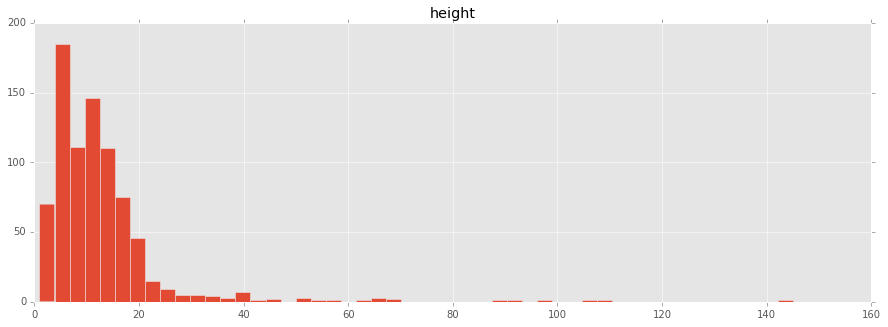

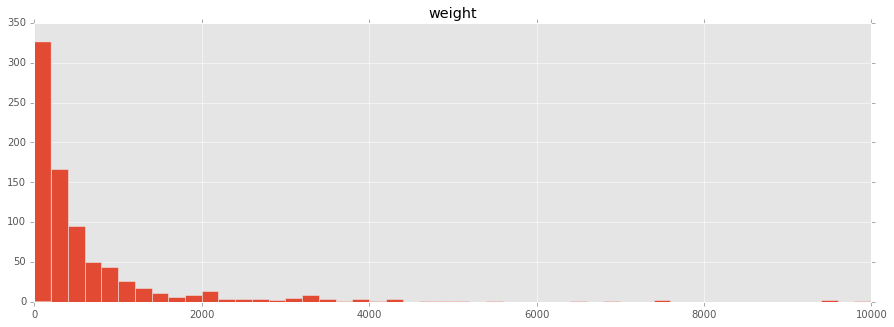

In [30]:
%matplotlib inline
pokemons[['height']].hist(bins=50,figsize=(15,5)), pokemons[['weight']].hist(bins=50,figsize=(15,5))

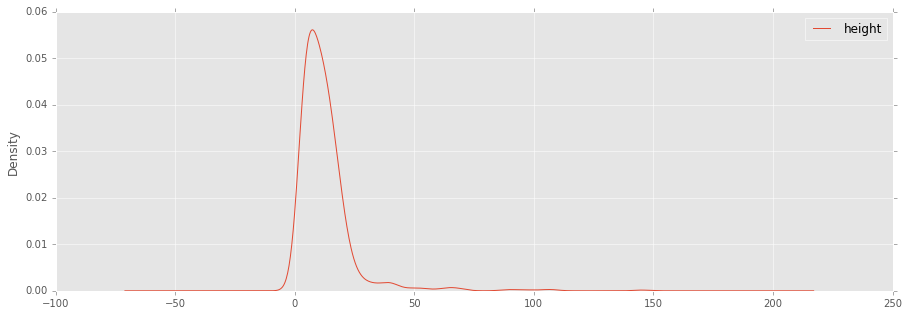

In [63]:
pokemons[['height']].plot(kind='density',figsize=(15,5))

### Filtering Values

In [31]:
filtered_pokemons = pokemons[pokemons['height']>=15]
filtered_pokemons.head(2)

,id,identifier,species_id,height,weight,base_experience,order,is_default,new_column
2,3,venusaur,3,20,1000,236,3,1,MGA POGING POKEMON
5,6,charizard,6,17,905,240,7,1,MGA POGING POKEMON


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c747f50>]], dtype=object)

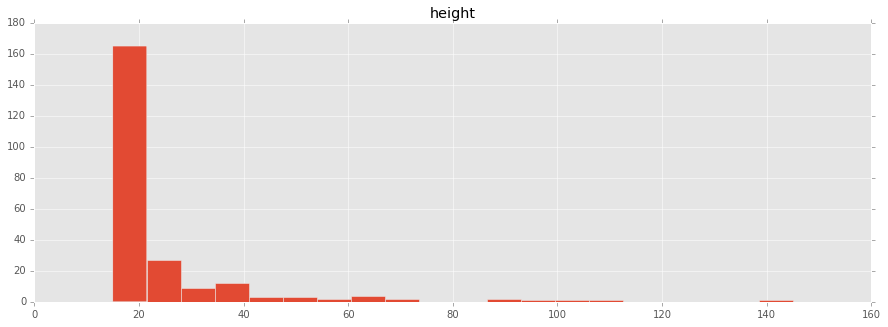

In [32]:
filtered_pokemons[['height']].hist(bins=20,figsize=(15,5))

### Merge Data

In [33]:
pokemon_species.columns, pokemons.columns

(Index([u'id', u'identifier', u'generation_id', u'evolves_from_species_id',
        u'evolution_chain_id', u'color_id', u'shape_id', u'habitat_id',
        u'gender_rate', u'capture_rate', u'base_happiness', u'is_baby',
        u'hatch_counter', u'has_gender_differences', u'growth_rate_id',
        u'forms_switchable', u'order', u'conquest_order'],
       dtype='object'),
 Index([u'id', u'identifier', u'species_id', u'height', u'weight',
        u'base_experience', u'order', u'is_default', u'new_column'],
       dtype='object'))

In [34]:
pokemon_species.columns = [u'species_id', u'identifier', u'generation_id', u'evolves_from_species_id',\
        u'evolution_chain_id', u'color_id', u'shape_id', u'habitat_id',\
        u'gender_rate', u'capture_rate', u'base_happiness', u'is_baby',\
        u'hatch_counter', u'has_gender_differences', u'growth_rate_id',\
        u'forms_switchable', u'order', u'conquest_order']

In [35]:
pokemon_species_merged = pd.DataFrame()
pokemon_species_merged = pokemons.merge(pokemon_species,on=['species_id'],how='left')

In [36]:
pokemon_species_merged.head(2)

,id,identifier_x,species_id,height,weight,base_experience,order_x,is_default,new_column,identifier_y,...,gender_rate,capture_rate,base_happiness,is_baby,hatch_counter,has_gender_differences,growth_rate_id,forms_switchable,order_y,conquest_order
0,1,bulbasaur,1,7,69,64,1,1,MGA POGING POKEMON,bulbasaur,...,1,45,70,0,20,0,4,0,1,NaN
1,2,ivysaur,2,10,130,142,2,1,"AY HINDI PALA POGI, HALAMAN PALA SILA.",ivysaur,...,1,45,70,0,20,0,4,0,2,NaN


In [37]:
pokemon_species_names_english = pokemon_species_names[pokemon_species_names.local_language_id==9]
pokemon_species_names_english.columns = [u'species_id', u'local_language_id', u'name', u'genus']
pokemon_species_merged_english = pokemon_species_merged.merge(pokemon_species_names_english,\
                                                             on=['species_id'],how='left')

In [38]:
pokemon_species_merged_english.columns

Index([                     u'id',            u'identifier_x',
                    u'species_id',                  u'height',
                        u'weight',         u'base_experience',
                       u'order_x',              u'is_default',
                    u'new_column',            u'identifier_y',
                 u'generation_id', u'evolves_from_species_id',
            u'evolution_chain_id',                u'color_id',
                      u'shape_id',              u'habitat_id',
                   u'gender_rate',            u'capture_rate',
                u'base_happiness',                 u'is_baby',
                 u'hatch_counter',  u'has_gender_differences',
                u'growth_rate_id',        u'forms_switchable',
                       u'order_y',          u'conquest_order',
             u'local_language_id',                    u'name',
                         u'genus'],
      dtype='object')

### Aggregations

In [39]:
pokemon_species_merged_agg = pokemon_species_merged_english.groupby("genus").agg({'id': np.count_nonzero, \
                                             'height': np.mean,\
                                             'weight': np.median})
pokemon_species_merged_agg.tail(5)

,id,weight,height
genus,,,
Wool,2,105.5,7.0
Worm,2,32.5,3.0
Wrestling,1,215.0,8.0
Young Fowl,1,195.0,9.0
Zen Charm,1,375.0,6.0


In [40]:
pokemon_species_merged_english[pokemon_species_merged_english.genus=='Worm']

,id,identifier_x,species_id,height,weight,base_experience,order_x,is_default,new_column,identifier_y,...,is_baby,hatch_counter,has_gender_differences,growth_rate_id,forms_switchable,order_y,conquest_order,local_language_id,name,genus
9,10,caterpie,10,3,29,39,14,1,MGA POGING POKEMON,caterpie,...,0,15,0,2,0,10,NaN,9,Caterpie,Worm
264,265,wurmple,265,3,36,39,320,1,MGA POGING POKEMON,wurmple,...,0,15,0,2,0,290,NaN,9,Wurmple,Worm


In [41]:
pokemon_species_merged_english['id'][pokemon_species_merged_english.genus=='Worm'].count()

2

### Transform DataFrames (rows as columns)

In [42]:
pokemon_species_merged_agg.T

genus,Abundance,Acorn,Alpha,Angler,Ant Pit,Anteater,Antenna,Aqua Mouse,Aqua Rabbit,Arm Thrust,...,Wind Chime,Windveiled,Wing Fish,Wish,Wood Gecko,Wool,Worm,Wrestling,Young Fowl,Zen Charm
id,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
weight,680.0,40.0,3200.0,120.0,150.0,580.0,22.0,85.0,285.0,2538.0,...,10.0,66.0,70.0,11.0,133.0,105.5,32.5,215.0,195.0,375.0
height,14.0,5.0,32.0,5.0,7.0,14.0,2.0,4.0,8.0,23.0,...,6.0,7.0,4.0,3.0,7.0,7.0,3.0,8.0,9.0,6.0


### Working with Scikit Learn

In [44]:
test_data = pd.read_csv("../maprdata/pyspark-churn-prediction/data/churn-bigml-20.csv",sep=",")
train_data = pd.read_csv("../maprdata/pyspark-churn-prediction/data/churn-bigml-80.csv",sep=",")

In [54]:
test_data.columns

Index([u'State', u'Account length', u'Area code', u'International plan',
       u'Voice mail plan', u'Number vmail messages', u'Total day minutes',
       u'Total day calls', u'Total day charge', u'Total eve minutes',
       u'Total eve calls', u'Total eve charge', u'Total night minutes',
       u'Total night calls', u'Total night charge', u'Total intl minutes',
       u'Total intl calls', u'Total intl charge', u'Customer service calls',
       u'Churn'],
      dtype='object')

In [64]:
# test_data_sample = test_data[[u'Total day calls', u'Total day charge', u'Total eve minutes',\
#                              u'State', u'International plan',\
#                              u'Churn']]
test_data_sample = test_data

In [65]:
#test_data_sample.describe().T
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,667.0,102.841079,40.819480,1.00,76.00,102.00,128.000,232.00
Area code,667.0,436.157421,41.783305,408.00,408.00,415.00,415.000,510.00
Number vmail messages,667.0,8.407796,13.994480,0.00,0.00,0.00,20.000,51.00
Total day minutes,667.0,180.948126,55.508628,25.90,146.25,178.30,220.700,334.30
Total day calls,667.0,100.937031,20.396790,30.00,87.50,101.00,115.000,165.00
Total day charge,667.0,30.761769,9.436463,4.40,24.86,30.31,37.520,56.83
Total eve minutes,667.0,203.355322,49.719268,48.10,171.05,203.70,236.450,361.80
Total eve calls,667.0,100.476762,18.948262,37.00,88.00,101.00,113.000,168.00
Total eve charge,667.0,17.285262,4.226160,4.09,14.54,17.31,20.095,30.75
Total night minutes,667.0,199.685307,49.759931,23.20,167.95,201.60,231.500,367.70


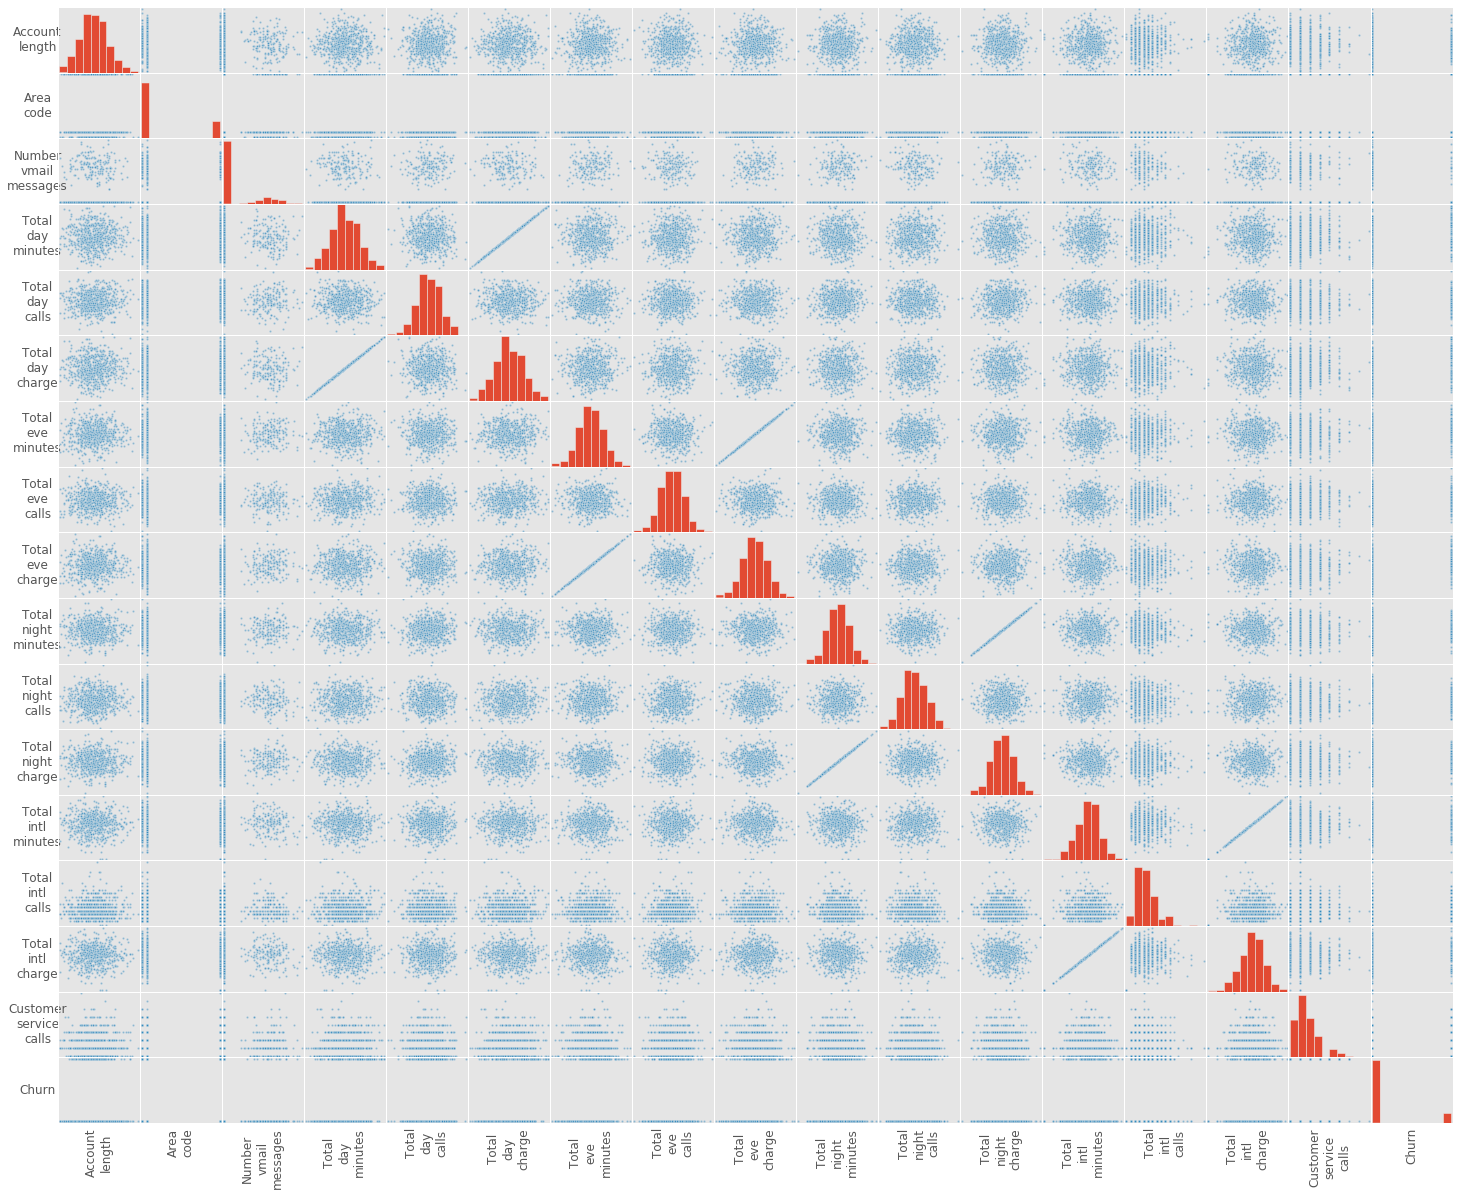

In [85]:
axs = pd.tools.plotting.scatter_matrix(test_data,figsize=(25,20))

# From http://stackoverflow.com/questions/23009509/how-to-modify-pandas-plotting-integration
def wrap(txt, width=8):
    '''helper function to wrap text for long labels'''
    import textwrap
    return '\n'.join(textwrap.wrap(txt, width))

for ax in axs[:,0]: # the left boundary
    ax.grid('off', axis='both')
    ax.set_ylabel(wrap(ax.get_ylabel()), rotation=0, va='center', labelpad=20)
    ax.set_yticks([])

for ax in axs[-1,:]: # the lower boundary
    ax.grid('off', axis='both')
    ax.set_xlabel(wrap(ax.get_xlabel()), rotation=90)
    ax.set_xticks([])

In [97]:
test_data.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True


In [107]:
test_data_features = test_data.drop(axis=1,labels=['State', 'Account length', 'Area code', 'International plan',\
       'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes',\
                             'Voice mail plan'])

In [108]:
test_data_features.columns

Index([u'Number vmail messages', u'Total day calls', u'Total day charge',
       u'Total eve calls', u'Total eve charge', u'Total night calls',
       u'Total night charge', u'Total intl calls', u'Total intl charge',
       u'Customer service calls', u'Churn'],
      dtype='object')

### Train a Random Forest Regressor

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [111]:
test_predictors = test_data_features[[u'Number vmail messages', u'Total day calls', u'Total day charge',\
                                       u'Total eve calls', u'Total eve charge', u'Total night calls',\
                                      u'Total night charge', u'Total intl calls', u'Total intl charge',\
                                      u'Customer service calls']]
test_label = test_data_features[[u'Churn']]

In [117]:
rf.fit(test_predictors.values, np.ravel(test_label.values))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [126]:
rf.score(test_predictors.values,np.ravel(test_label.values))

0.88940614648509375

In [139]:
test_data_sample[['Churn','Total day calls']].groupby("Churn").count()

,Total day calls
Churn,
False,572
True,95
